<a href="https://colab.research.google.com/github/KristianEka/dicoding-data-analysis-python/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Kristian Ekachandra
- **Email:** kristianekachandra8@gmail.com
- **ID Dicoding:** kristianeka

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren penggunaan sepeda dari tahun 2011 ke 2012?
- Pertanyaan 2: Bagaimana pola pengunaan sepeda berdasarkan musin (spring, summer, fall, winter)?
- Pertanyaan 3: Apakah ada pola khusus dalam penggunaan sepeda berdasarkan hari dalam seminggu (weekday vs weekend)?
- Pertanyaan 4: Faktor apa yang paling berpengaruh dalam meningkatkan jumlah pendafataran pengguna (registered users)?
- Pertanyaan 5: Seberapa besar korelasi antara kelembaban udara dengan jumlah pinjaman sepeda?
- Pertanyaan 6: Jam berapa penggunaan sepeda paling tinggi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- pada data hour_df ada 1 kolom tambahan yaitu hr dan datanya lebih banyak karena 1 hari bisa beberapa baris, karena data berdasarkan dengan jam. Data ini cocok untuk digunakan pada hal-hal yang lebih spesifik misal di jam berapa banyak menggunakan sepeda.
- pada data day_df adalah merupakan rangkuman data dari satu hari bike sharing, sehingga cocok untuk dipakai untuk melihat bike sharing secara lebih luas.

### Assessing Data

Data hour_df


In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Data day_df


In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Banyak data kategorik yang menggunakan angka untuk merepresentasikan maksud pada masing-masing kolom, perlu mengganti data kategorik menjadi nilai yang sebenarnya agar mudah dibaca
- Terdapat kesalahan tipe data pada kolom dteday harusnya datetime bukan object untuk data hour_df dan day_df
- Tidak ada data yang N\A atau null dan tidak ada data yang terindikasi duplikat

### Cleaning Data

In [10]:
season_mapping = {1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

if hour_df['season'].dtype == 'int64':
    hour_df['season'] = hour_df['season'].map(season_mapping)

if day_df['season'].dtype == 'int64':
    day_df['season'] = day_df['season'].map(season_mapping)

In [11]:
display(hour_df['season'].value_counts())
display(day_df['season'].value_counts())

,count
season,
Fall,4496
Summer,4409
Springer,4242
Winter,4232


,count
season,
Fall,188
Summer,184
Springer,181
Winter,178


In [12]:
year_mapping = {0: 2011, 1: 2012}

if hour_df['yr'].max() < 3:
    hour_df['yr'] = hour_df['yr'].map(year_mapping)

if day_df['yr'].max() < 3:
    day_df['yr'] = day_df['yr'].map(year_mapping)

In [13]:
display(hour_df['yr'].value_counts())
display(day_df['yr'].value_counts())

,count
yr,
2012,8734
2011,8645


,count
yr,
2012,366
2011,365


In [14]:
hour_df['workingday'] = hour_df['workingday'].astype(bool)
day_df['workingday'] = day_df['workingday'].astype(bool)

In [15]:
display(hour_df['workingday'].value_counts())
display(day_df['workingday'].value_counts())

,count
workingday,
True,11865
False,5514


,count
workingday,
True,500
False,231


In [16]:
hour_df['holiday'] = hour_df['holiday'].astype(bool)
day_df['holiday'] = day_df['holiday'].astype(bool)

In [17]:
display(hour_df['holiday'].value_counts())
display(day_df['holiday'].value_counts())

,count
holiday,
False,16879
True,500


,count
holiday,
False,710
True,21


In [18]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])
  day_df[column] = pd.to_datetime(day_df[column])

hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  bool          
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  bool          
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Kolom weathersit tidak diubah ke dalam bentuk value asli dikarenakan value asli terlalu panjang, jadi akan ditambagkan legend saja saat visualisasi data.
- Seluruh data pada kolom: season, holiday, workingday, dan yr di ubah ke bentuk asli sesuai dokumentasi untuk memudahkan membaca data.
- Perubahan pada data mengakibatkan perubahan tipe data.

## Exploratory Data Analysis (EDA)

### Explore hour_df

In [19]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,NaN,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,NaN,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,NaN,NaN,16879,NaN,11865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,6.537775,11.546752,NaN,3.003683,NaN,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,1.000000,0.000000,NaN,0.000000,NaN,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,4.000000,6.000000,NaN,1.000000,NaN,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,7.000000,12.000000,NaN,3.000000,NaN,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,10.000000,18.000000,NaN,5.000000,NaN,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,12.000000,23.000000,NaN,6.000000,NaN,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [20]:
hour_df.groupby(by="season").agg({
    "cnt": ["nunique", "max", "min", "mean", "sum", "std"]
}).sort_values(by=('cnt', 'sum'), ascending=False)

cnt                                          
         nunique  max min        mean      sum         std
season                                                    
Fall         760  977   1  236.016237  1061129  197.711630
Summer       721  957   1  208.344069   918589  188.362473
Winter       690  967   1  198.868856   841613  182.967972
Springer     482  801   1  111.114569   471348  119.224010

In [21]:
# Group by season and hour, calculate total rentals
seasonal_hourly_rentals = hour_df.groupby(['season', 'hr'])['cnt'].sum().reset_index()

# Function to get top n hours for a season
def get_top_hours(season, n=5):
    top_hours = seasonal_hourly_rentals[seasonal_hourly_rentals['season'] == season].sort_values(by='cnt', ascending=False).head(n)
    return top_hours

# Get top 5 hours for each season
for season in hour_df['season'].unique():
    top_hours = get_top_hours(season)
    print(f"Top 5 hours for {season}:\n{top_hours}\n")

Top 5 hours for Springer:
      season  hr    cnt
41  Springer  17  47780
42  Springer  18  43110
32  Springer   8  42095
40  Springer  16  32999
43  Springer  19  29837

Top 5 hours for Summer:
    season  hr    cnt
65  Summer  17  95468
66  Summer  18  88904
56  Summer   8  69945
67  Summer  19  65994
64  Summer  16  63831

Top 5 hours for Fall:
   season  hr     cnt
17   Fall  17  107562
18   Fall  18  102330
8    Fall   8   79204
19   Fall  19   78383
16   Fall  16   69516

Top 5 hours for Winter:
    season  hr    cnt
89  Winter  17  86050
90  Winter  18  75428
80  Winter   8  69757
88  Winter  16  61402
91  Winter  19  52575



In [22]:
# Hourly Rental Patterns by Weekday/Weekend

hour_df.groupby(['weekday', 'hr'])['cnt'].agg(
    ['sum', 'mean', 'std']
).sort_values(by=['sum'], ascending=False) # Change by argument to 'sum'

,,sum,mean,std
weekday,hr,,,
2,17,56605,544.278846,225.360701
4,17,54844,527.346154,236.143480
2,18,53827,517.567308,215.335357
3,17,53367,513.144231,246.539011
1,17,52249,502.394231,232.021275
...,...,...,...,...
4,3,497,5.071429,2.954116
1,3,496,5.113402,4.797734
3,3,484,4.888889,3.768529


In [23]:
# Rental Behavior by Weather Conditions

hour_df.groupby(['weathersit', 'hr'])['cnt'].agg(
    ['sum', 'mean']
).sort_values(by=['mean'], ascending=False)

sum        mean
weathersit hr                    
1          17  253718  500.429980
           18  229220  458.440000
2          17   62167  422.904762
           8    89604  391.283843
           18   61686  390.417722
...               ...         ...
1          3     5458   11.995604
3          3      375    6.944444
2          4     1230    6.721311
1          4     2931    6.413567
3          4      267    4.684211

[75 rows x 2 columns]

In [24]:
# Impact of Temperature

hour_df.groupby(pd.cut(hour_df['temp'], bins=5))['cnt'].agg(['sum', 'mean', 'std'])

<ipython-input-24-b5e5db2859cb>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(pd.cut(hour_df['temp'], bins=5))['cnt'].agg(['sum', 'mean', 'std'])


,sum,mean,std
temp,,,
"(0.019, 0.216]",69624,65.069159,81.307607
"(0.216, 0.412]",659269,123.066828,127.507677
"(0.412, 0.608]",996132,194.671096,179.882793
"(0.608, 0.804]",1336324,260.695279,203.989831
"(0.804, 1.0]",231330,326.276446,164.762377


In [25]:
# Impact of Humidity

hour_df.groupby(pd.cut(hour_df['hum'], bins=5))['cnt'].agg(['sum', 'mean', 'std'])

<ipython-input-25-1d45a2662442>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(pd.cut(hour_df['hum'], bins=5))['cnt'].agg(['sum', 'mean', 'std'])


,sum,mean,std
hum,,,
"(-0.001, 0.2]",21465,225.947368,215.716588
"(0.2, 0.4]",686843,288.105285,194.063453
"(0.4, 0.6]",1219823,221.745683,185.236059
"(0.6, 0.8]",939003,172.896888,174.162003
"(0.8, 1.0]",425545,107.244204,129.812143


In [26]:
# User Type Analysis

hour_df.groupby(['hr'])[['casual', 'registered']].agg(['sum', 'mean'])

casual            registered            
      sum       mean        sum        mean
hr                                         
0    7375  10.158402      31755   43.739669
1    4709   6.504144      19455   26.871547
2    3412   4.772028      12940   18.097902
3    1893   2.715925       6281    9.011478
4     874   1.253945       3554    5.098996
5    1012   1.411437      13249   18.478382
6    3017   4.161379      52115   71.882759
7    8037  11.055021     146134  201.009629
8   15761  21.679505     245240  337.331499
9   22458  30.891334     136980  188.418157
10  33789  46.477304      92468  127.191197
11  43286  59.540578     108034  148.602476
12  49718  68.293956     134696  185.021978
13  52713  72.308642     132206  181.352538
14  55089  75.567901     120563  165.381344
15  54606  74.905350     128543  176.327846
16  53834  73.745205     173914  238.238356
17  54220  74.273973     282640  387.178082
18  44496  61.120879     265276  364.390110
19  35505  48.770604     191284  262.752747
20  26378  36.233516     138172  189.796703
21  20570  28.255495     104875  144.059066
22  16200  22.252747      79412  109.082418
23  11065  15.199176      52876   72.631868

In [27]:
# Month-wise Trends

hour_df.groupby(['mnth', 'hr'])['cnt'].agg(['sum', 'mean']).sort_values(by=['sum'], ascending=False)

,,sum,mean
mnth,hr,,
8,17,36675,591.532258
9,17,35774,596.233333
6,17,35347,589.116667
8,18,35103,575.459016
10,17,34863,571.524590
...,...,...,...
2,3,308,6.039216
4,4,289,4.898305
3,4,228,4.145455


### Explore daf_df

In [28]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,NaN,710,NaN,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,6.519836,NaN,2.997264,NaN,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,1.000000,NaN,0.000000,NaN,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,4.000000,NaN,1.000000,NaN,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,7.000000,NaN,3.000000,NaN,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,10.000000,NaN,5.000000,NaN,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,12.000000,NaN,6.000000,NaN,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [29]:
day_df.groupby(by="season").agg({
    "cnt": ["nunique", "max", "min", "mean", "sum", "std"]
}).sort_values(by=('cnt', 'sum'), ascending=False)

cnt                                               
         nunique   max   min         mean      sum          std
season                                                         
Fall         188  8714  1115  5644.303191  1061129  1459.800381
Summer       182  8362   795  4992.331522   918589  1695.977235
Winter       176  8555    22  4728.162921   841613  1699.615261
Springer     179  7836   431  2604.132597   471348  1399.942119

In [30]:
# Rental Trends by Year and Season

day_df.groupby(by=["yr", "season"]).agg({
       "cnt": ["nunique", "max", "min", "mean", "sum", "std"],
       "registered": "sum",
       "casual": "sum"
   }).sort_values(by=('cnt', 'sum'), ascending=False)

cnt                                                \
              nunique   max   min         mean     sum          std   
yr   season                                                           
2012 Fall          94  8714  4073  6824.244681  641479   912.756191   
     Summer        92  8362  1027  6209.489130  571273  1221.345569   
     Winter        89  8555    22  5791.865169  515476  1598.520901   
2011 Fall          94  6043  1115  4464.361702  419650   798.348077   
     Summer        90  5805   795  3775.173913  347316  1138.901028   
     Winter        88  5511   627  3664.460674  326137   983.006128   
2012 Springer      91  7836   441  3531.296703  321348  1341.203270   
2011 Springer      89  3239   431  1666.666667  150000   614.012663   

              registered  casual  
                     sum     sum  
yr   season                       
2012 Fall         510838  130641  
     Summer       445315  125958  
     Winter       438507   76969  
2011 Fall         324200   95450  
     Summer       269752   77564  
     Winter       273324   52813  
2012 Springer     282151   39197  
2011 Springer     128575   21425

In [31]:
# Weekday vs. Weekend Rentals

day_df.groupby(by=["weekday"]).agg({
       "cnt": ["sum", "mean", "std"],
       "registered": "sum",
       "casual": "sum"
   }).sort_values(by=('cnt', 'sum'), ascending=False)

cnt                           registered  casual
            sum         mean          std        sum     sum
weekday                                                     
5        487790  4690.288462  1874.624870     409552   78238
4        485395  4667.259615  1939.433317     423935   61460
6        477807  4550.542857  2196.693009     323955  153852
3        473048  4548.538462  2038.095884     415729   57319
2        469109  4510.663462  1826.911642     411266   57843
1        455503  4338.123810  1793.074013     384719   70784
0        444027  4228.828571  1872.496629     303506  140521

In [32]:
# Impact of Weather on Daily Rentals

day_df.groupby(by=["weathersit"]).agg({
       "cnt": ["sum", "mean", "std"],
       "registered": "sum",
       "casual": "sum"
   }).sort_values(by=('cnt', 'sum'), ascending=False)

cnt                           registered  casual
                sum         mean          std        sum     sum
weathersit                                                      
1           2257952  4876.786177  1879.483989    1811606  446346
2            996858  4035.862348  1809.109918     827082  169776
3             37869  1803.285714  1240.284449      33974    3895

In [33]:
# Holiday Effects
day_df.groupby(by=["holiday"]).agg({
       "cnt": ["sum", "mean", "std"],
       "registered": "sum",
       "casual": "sum"
   })

cnt                           registered  casual
             sum         mean          std        sum     sum
holiday                                                      
False    3214244  4527.104225  1929.013947    2616586  597658
True       78435  3735.000000  2103.350660      56076   22359

In [34]:
# Analyzing Working Days
day_df.groupby(by=["workingday"]).agg({
       "cnt": ["sum", "mean", "std"],
       "registered": "sum",
       "casual": "sum"
   })

cnt                           registered  casual
                sum         mean          std        sum     sum
workingday                                                      
False       1000269  4330.168831  2052.141245     683537  316732
True        2292410  4584.820000  1878.415583    1989125  303285

In [35]:
# Merge data berdasarkan tanggal (dteday)
main_data_df = pd.merge(hour_df, day_df, on="dteday", suffixes=("_hourly", "_daily"))
main_data_df.head()

,instant_hourly,dteday,season_hourly,yr_hourly,mnth_hourly,hr,holiday_hourly,weekday_hourly,workingday_hourly,weathersit_hourly,...,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,hum_daily,windspeed_daily,casual_daily,registered_daily,cnt_daily
0,1,2011-01-01,Springer,2011,1,0,False,6,False,1,...,6,False,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,Springer,2011,1,1,False,6,False,1,...,6,False,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,Springer,2011,1,2,False,6,False,1,...,6,False,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,Springer,2011,1,3,False,6,False,1,...,6,False,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,Springer,2011,1,4,False,6,False,1,...,6,False,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [36]:
main_data_df.groupby(by="yr_daily").agg({
    "cnt_daily": ["nunique", "max", "min", "mean", "sum", "std"]
}).sort_values(by=('cnt_daily', 'sum'), ascending=False)

cnt_daily                                               
           nunique   max  min         mean       sum          std
yr_daily                                                         
2012           356  8714   22  5624.660179  49125782  1756.567658
2011           352  6043  431  3431.494274  29665268  1362.373981

In [37]:
main_data_df.groupby(by="season_daily").agg({
    "cnt_daily": ["nunique", "max", "min", "mean", "sum", "std"],
    "registered_daily": "sum",
    "casual_daily": "sum"
}).sort_values(by=('cnt_daily', 'sum'), ascending=False)

cnt_daily                                                  \
               nunique   max   min         mean       sum          std   
season_daily                                                             
Fall               188  8714  1115  5654.093194  25420803  1446.451168   
Summer             182  8362   795  4995.253119  22024071  1690.209773   
Winter             176  8555    22  4765.366021  20167029  1654.202601   
Springer           179  7836   431  2635.348185  11179147  1391.789800   

             registered_daily casual_daily  
                          sum          sum  
season_daily                                
Fall                 20006927      5413876  
Summer               17143386      4880685  
Winter               17054528      3112501  
Springer              9738639      1440508

In [38]:
main_data_df.groupby(by="weekday_hourly").agg({
    "cnt_hourly": ["nunique", "max", "min", "mean", "sum", "std"]
}).sort_values(by=('cnt_hourly', 'sum'), ascending=False)

cnt_hourly                                         
                  nunique  max min        mean     sum         std
weekday_hourly                                                    
5                     584  957   1  196.135907  487790  174.076894
4                     606  976   1  196.436665  485395  188.011923
6                     609  783   1  190.209793  477807  179.820569
3                     616  977   1  191.130505  473048  190.894464
2                     598  970   1  191.238891  469109  187.820480
1                     595  968   1  183.744655  455503  179.514167
0                     571  776   1  177.468825  444027  168.167710

**Insight:**
- Penggunaan sepeda tertinggi terjadi pada musim Fall, dengan total peminjaman mencapai 1061129. Hal ini kemungkinan disebabkan oleh cuaca yang sejuk dan nyaman, sehingga mendorong masyarakat untuk beraktivitas di luar ruangan menggunakan sepeda.
- Terdapat perbedaan signifikan dalam pola penggunaan sepeda antara hari kerja dan akhir pekan. Pada hari kerja, puncak penggunaan terjadi pada pukul 08.00 dan 17.00, yang mengindikasikan penggunaan sepeda untuk pergi dan pulang kerja. Sedangkan di akhir pekan, penggunaan sepeda lebih tersebar sepanjang hari, dengan puncak penggunaan pada siang hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1: **Tren Penggunaan Sepeda dari 2011 ke 2012**

<ipython-input-39-df249cc23a04>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="yr_daily", y="cnt_daily", data=main_data_df, estimator=sum, palette="Blues")


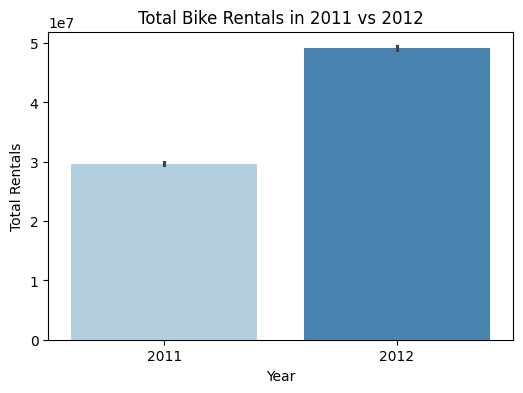

In [39]:
plt.figure(figsize=(6,4))
sns.barplot(x="yr_daily", y="cnt_daily", data=main_data_df, estimator=sum, palette="Blues")
plt.xlabel("Year")
plt.ylabel("Total Rentals")
plt.title("Total Bike Rentals in 2011 vs 2012")
plt.show()

### Pertanyaan 2: **Pola Penggunaan Sepeda Berdasarkan Musim**

<ipython-input-40-6b905a9e7556>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season_daily", y="cnt_daily", data=main_data_df, estimator=np.mean, palette="coolwarm")


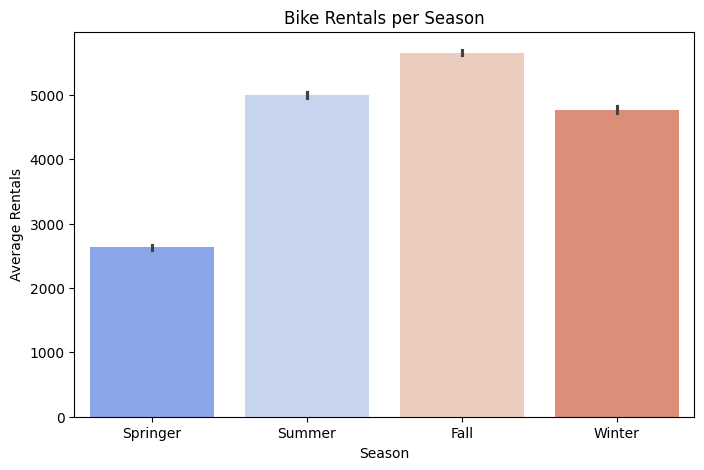

In [40]:
plt.figure(figsize=(8,5))
sns.barplot(x="season_daily", y="cnt_daily", data=main_data_df, estimator=np.mean, palette="coolwarm")
plt.xlabel("Season")
plt.ylabel("Average Rentals")
plt.title("Bike Rentals per Season")
plt.show()

### Pertanyaan 3: **Pola Penggunaan Berdasarkan Hari dalam Seminggu**

<ipython-input-41-16dd9d5c93e2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weekday_hourly", y="cnt_hourly", data=main_data_df, estimator=np.mean, palette="viridis")


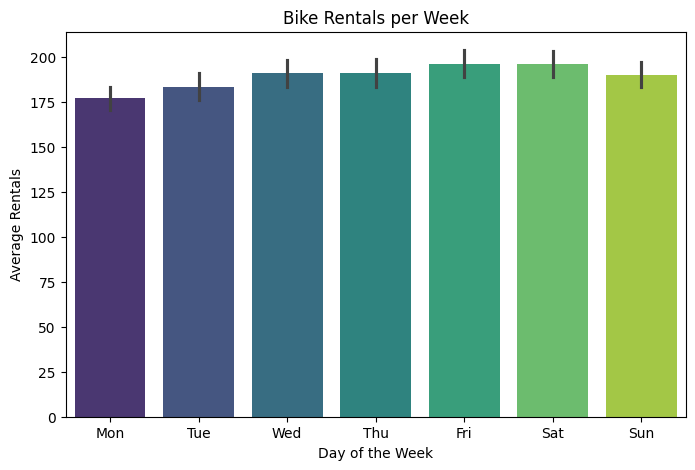

In [41]:
plt.figure(figsize=(8,5))
sns.barplot(x="weekday_hourly", y="cnt_hourly", data=main_data_df, estimator=np.mean, palette="viridis")
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.xlabel("Day of the Week")
plt.ylabel("Average Rentals")
plt.title("Bike Rentals per Week")
plt.show()

### Pertanyaan 4: **Faktor yang Berpengaruh pada Registered Users**

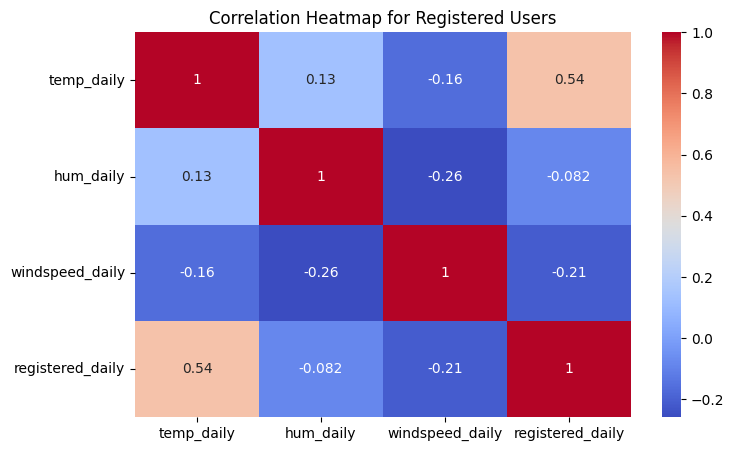

In [42]:
plt.figure(figsize=(8,5))
sns.heatmap(main_data_df[["temp_daily", "hum_daily", "windspeed_daily", "registered_daily"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Registered Users")
plt.show()

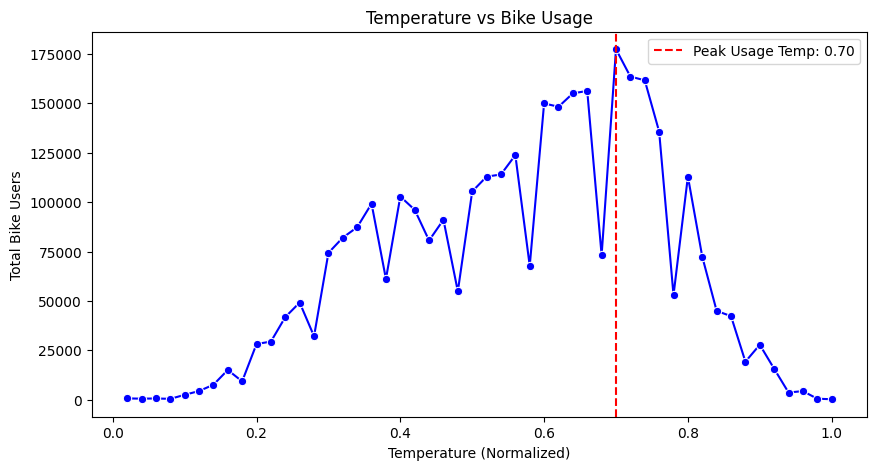

,34
temp_hourly,0.7
cnt_hourly,177298.0


In [43]:
temp_usage = main_data_df.groupby('temp_hourly')['cnt_hourly'].sum().reset_index()

# Cari suhu dengan jumlah pengguna tertinggi
most_popular_temp = temp_usage.loc[temp_usage['cnt_hourly'].idxmax()]

# Visualisasi hubungan suhu dan jumlah pengguna sepeda
plt.figure(figsize=(10,5))
sns.lineplot(x='temp_hourly', y='cnt_hourly', data=temp_usage, marker='o', color='b')
plt.axvline(most_popular_temp['temp_hourly'], color='r', linestyle='--', label=f"Peak Usage Temp: {most_popular_temp['temp_hourly']:.2f}")
plt.xlabel("Temperature (Normalized)")
plt.ylabel("Total Bike Users")
plt.title("Temperature vs Bike Usage")
plt.legend()
plt.show()

# Tampilkan suhu dengan jumlah pengguna tertinggi
most_popular_temp

In [44]:
# Skala suhu yang digunakan dalam dataset
t_min = -8  # Suhu minimum dalam dataset
t_max = 39  # Suhu maksimum dalam dataset

# Ambil nilai suhu yang paling diminati pengguna sepeda melonjak
temp_normalized = main_data_df.loc[main_data_df['cnt_hourly'].idxmax(), 'temp_hourly']

# Konversi suhu ke skala asli
temp_original = temp_normalized * (t_max - t_min) + t_min

print(f"Suhu yang paling diminati pengguna sepeda melonjak: {temp_original:.2f}°C")

Suhu yang paling diminati pengguna sepeda melonjak: 23.02°C


### Pertanyaan 5: **Korelasi Kelembaban dengan Jumlah Peminjaman Sepeda**

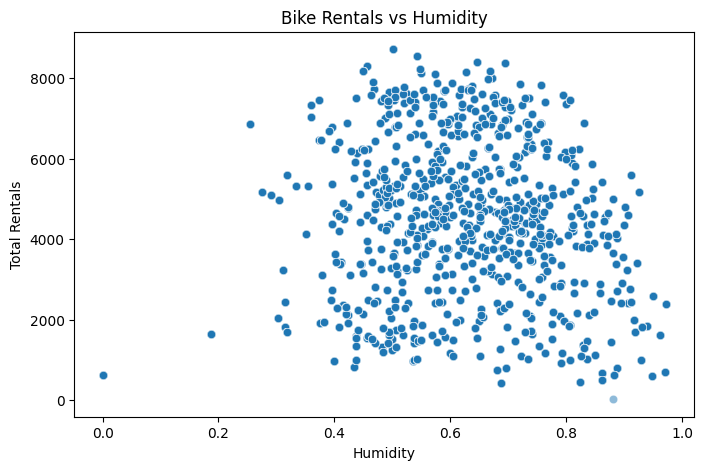

In [45]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="hum_daily", y="cnt_daily", data=main_data_df, alpha=0.5)
plt.xlabel("Humidity")
plt.ylabel("Total Rentals")
plt.title("Bike Rentals vs Humidity")
plt.show()

### Pertanyaan 6: **Jam Berapa Penggunaan Sepeda Paling Tinggi?**

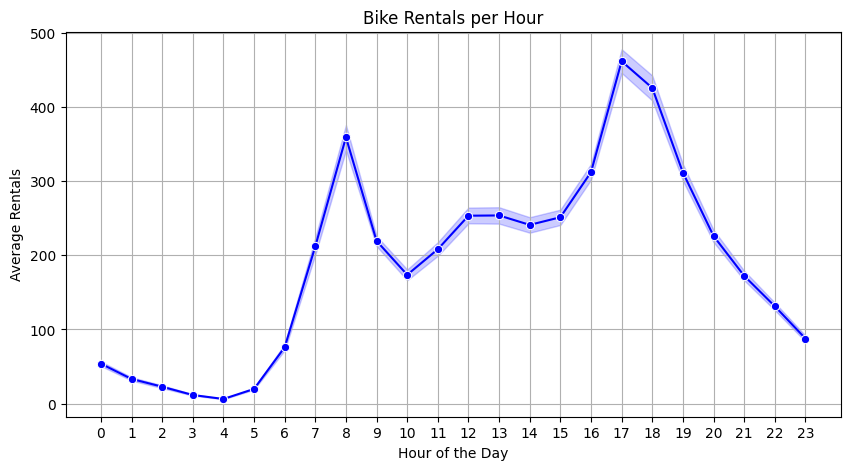

In [46]:
plt.figure(figsize=(10,5))
sns.lineplot(x="hr", y="cnt_hourly", data=main_data_df, estimator=np.mean, marker="o", color="b")

plt.xlabel("Hour of the Day")
plt.ylabel("Average Rentals")
plt.title("Bike Rentals per Hour")
plt.xticks(range(0,24))
plt.grid()
plt.show()

**Insight:**
- Terjadi peningkatan penggunaan sepeda dari tahun 2011 sampai 2012
- Musim Fall menjadi pilihan banyak orang untuk menggunakan sepeda, mungkin saja suhu atau cuaca saat musim Fall cukup membuat orang menikmati bersepeda untuk aktivitas bepergian mereka.
- Tidak adanya perbedaan signifikan orang yang bersepda pada satu minggu, dan di akhir pekan biasanya orang lebih banyak yang menggunakan sepeda
- Orang melakukan register untuk sewa sepeda terjadi umumnya karena adanya tingkat suhu lingkungan yang sesuai. Contohnya suhu yang lebih sejuk pada musim Fall memungkinkan orang untuk bersepeda
- Kelembaban udara juga merupakan salah satu faktor orang menyewa sepeda
- Sore hari seperti pada jam 17.00 merupakan jam yang paling banyak orang menyewa sepeda. Mungkin saja itu jam pulang bekerja dan udara di luar sejuk.

## RFM Analysis


In [47]:
rfm_df = main_data_df.groupby('dteday').agg(
    Recency=('dteday', lambda x: (main_data_df['dteday'].max() - x.max()).days),
    Frequency=('dteday', 'count'),
    Monetary=('cnt_daily', 'sum')
)

rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], q=4, labels=[4, 3, 2, 1])
rfm_df['F_Score'] = pd.cut(rfm_df['Frequency'], bins=4, labels=[1, 2, 3, 4], duplicates='drop')
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], q=4, labels=[1, 2, 3, 4])

rfm_df['RFM_Segment'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)
rfm_df['RFM_Score'] = rfm_df[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

segments = {
    (4, 4, 4): 'Peak Days',
    (4, 4, 3): 'High Usage Days',
    (3, 4, 4): 'Growing Usage',
    (2, 4, 4): 'Stable Usage',
    (1, 3, 3): 'Declining Usage',
    (1, 1, 1): 'Low Usage Days'
}
rfm_df['Segment'] = rfm_df[['R_Score', 'F_Score', 'M_Score']].apply(lambda row: segments.get(tuple(row), 'Others'), axis=1)
rfm_df.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Segment
dteday,,,,,,,,,
2011-01-01,730,24,23640,1,4,1,141,6,Others
2011-01-02,729,23,18423,1,4,1,141,6,Others
2011-01-03,728,22,29678,1,4,1,141,6,Others
2011-01-04,727,23,35926,1,4,1,141,6,Others
2011-01-05,726,23,36800,1,4,1,141,6,Others


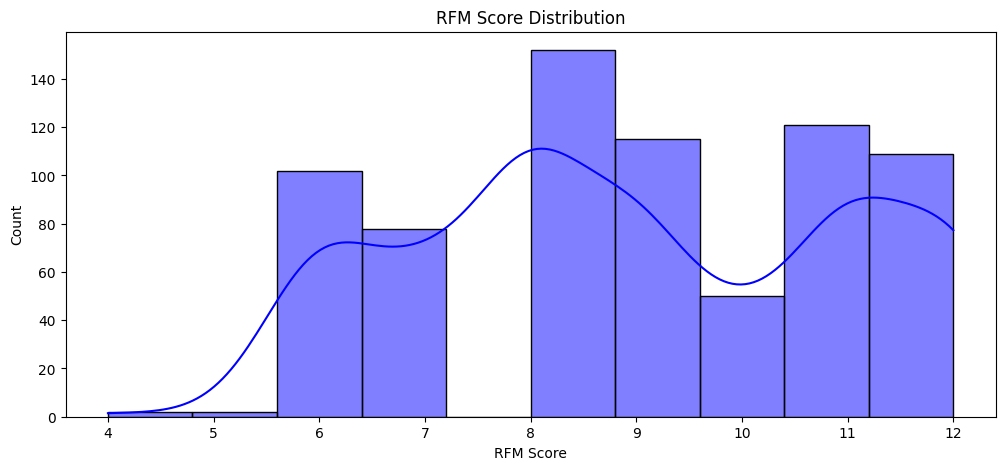

<ipython-input-48-79ec3dc83a4f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=rfm_df['Segment'], order=rfm_df['Segment'].value_counts().index, palette='coolwarm')


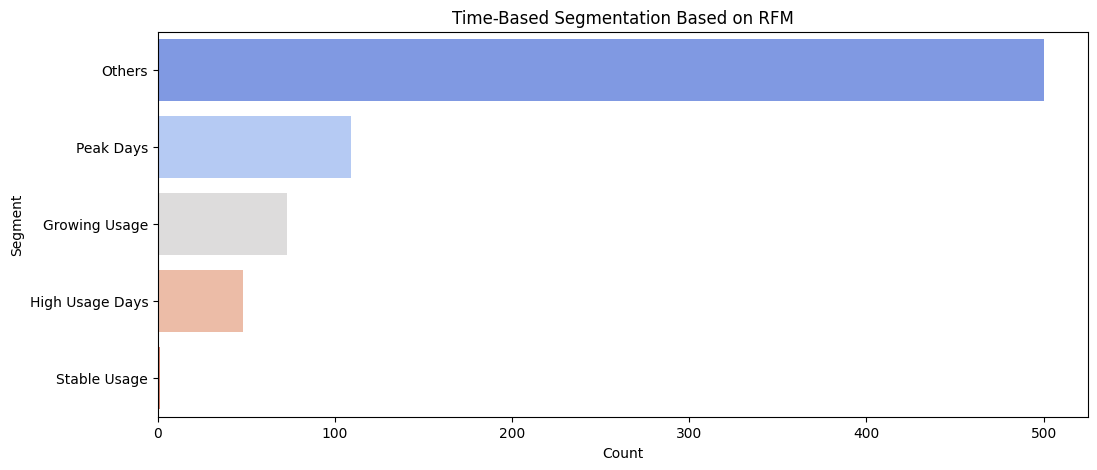

In [48]:
# Plot RFM distribution
plt.figure(figsize=(12, 5))
sns.histplot(rfm_df['RFM_Score'], bins=10, kde=True, color='blue')
plt.title("RFM Score Distribution")
plt.xlabel("RFM Score")
plt.ylabel("Count")
plt.show()

# Plot time-based segments
plt.figure(figsize=(12, 5))
sns.countplot(y=rfm_df['Segment'], order=rfm_df['Segment'].value_counts().index, palette='coolwarm')
plt.title("Time-Based Segmentation Based on RFM")
plt.xlabel("Count")
plt.ylabel("Segment")
plt.show()

## Conclusion

- Conclusion pertanyaan 1: Trend penggunaan sepeda meningkat dari tahun ke tahun. Dalam konteks data ini yaitu 2011 ke 2021 terjadi peningkatan penggunaan sepeda.
- Conclusion pertanyaan 2: Pola penggunaan sepeda yang paling laris terjadi saat musim Fall.
- Conclusion pertanyaan 3: Bila dilihat secara sekilas, penggunaan sepeda cenderung stabil setiap harinya. Namun penggunaan sepeda lebih banyak saat akhir pekan (weekend).
- Conclusion pertanyaan 4: faktor yang paling berpengaruh dalam meningkatkan jumlah pendaftaran pengguna yaitu saat suhu harian atau temp_daily sesuai atau bisa dikatan tidak terlalu dingin atau panas.
- Conclusion pertanyaan 5: Korelasi kelembaban udara dengan jumlah pinjaman sepeda di atas mayortias di atas 50%, yang menandakan bahwa terdapat korelasi yang cukup kuat antara kelembaban udara deengan jumlah pinjaman sepeda.
- Conclusion pertanyaan 6: Pinjaman sepeda paling banyak saat berada di pukul 17.00 yang juga merupakan jam banyak orang pulang bekerja.

In [49]:
main_data_df.to_csv("main_data.csv", index=False)